<a href="https://colab.research.google.com/github/Meetsud/bootcamp2/blob/main/Random_Forest_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing the data
df = pd.read_csv('boston.csv', index_col = 0)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
# Seperating the input and output features
X = df.drop('MEDV', axis = 1)
y = df['MEDV']

In [ ]:
# Performing train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [ ]:
# Creating the model
model = RandomForestRegressor(random_state = 3)

# Fitting the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=3)

In [ ]:
# Taking predictions from the model
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [ ]:
# Evaluating the model
print('Training RMSE :', np.round(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)), 3))
print('Training R2 Score :', np.round(metrics.r2_score(y_train, y_train_pred), 3))

print('\nTesting RMSE :', np.round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 3))
print('Testng R2 Score :', np.round(metrics.r2_score(y_test, y_pred), 3))

Training RMSE : 1.218
Training R2 Score : 0.983

Testing RMSE : 3.1
Testng R2 Score : 0.877


In [ ]:
'''
Comment -> From the above results, we can see that the model is overfitted
Please try using GridSearchCV() or RandomizedSearchCV() to improve the model
'''

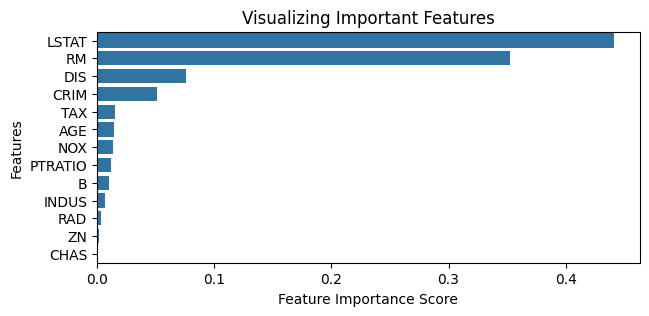

In [ ]:
# Feature Importance Plot
feature_imp = pd.Series(model.feature_importances_, index = X.columns).sort_values(ascending = False)
plt.figure(figsize = (7, 3))
sns.barplot(x = feature_imp, y = feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()